<div align="center" style="color: black;">

Published on **November 12, 2024.** By **Adnan Alaref**

</div>


## 📁 About the Dataset

The **Pneumonia Chest-Xray** is an image classification dataset that contains 2 different classes of objects, with a total of **5856 images**, organized into three folders: **Train**, **Test**, and **Val**.

I have adjusted this data and uploaded it to **Kaggle**. You can access it from my profile here:

[🔗 Pneumonia Chest-Xray Dataset on My Profile](https://www.kaggle.com/datasets/adnanalaref/pneumonia-chest-xray)


In [60]:
import glob

# Define the path to the dataset folder
dataset_path = '/kaggle/input/pneumonia-chest-xray/chest_xray'

# Use glob to find all image files in subdirectories (if needed)
image_files = glob.glob(os.path.join(dataset_path, '**', '*.jpg'), recursive=True) + \
              glob.glob(os.path.join(dataset_path, '**', '*.jpeg'), recursive=True) + \
              glob.glob(os.path.join(dataset_path, '**', '*.png'), recursive=True)

# Print the number of images
print(f'Total number of images: {len(image_files)}')


Total number of images: 5856


In [1]:
!pip install tensorflow==2.15 > /dev/null 2>&1

In [2]:
pip show keras tensorflow

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: 
Required-by: keras-tuner, tensorflow
---
Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: explainable-ai-sdk, tensorflow-cloud, tensorflow-serving-api, tensorflow-text, tensorflow_decision_forests, tf_keras, witwidget
Note: you may need to restart the kernel

In [ ]:
#pip install --upgrade tensorflow > /dev/null 2>&1

In [4]:
'''
%%capture
!pip install --upgrade keras'''

In [3]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

2024-11-16 20:05:43.340337: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-16 20:05:43.340398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-16 20:05:43.341811: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 1 : Import Library. </p>

In [4]:
import matplotlib.pyplot as plt

from tensorflow import keras

import tensorflow as tf

from glob import glob

import numpy as np

import cv2

import os

import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')
# Ignore all FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 2 : Show Dataset Folders. </p>

In [5]:
folders = glob(r"/kaggle/input/pneumonia-chest-xray/chest_xray/*")

folders

['/kaggle/input/pneumonia-chest-xray/chest_xray/val',
 '/kaggle/input/pneumonia-chest-xray/chest_xray/test',
 '/kaggle/input/pneumonia-chest-xray/chest_xray/train']

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 3 : Show Images. </p>

(1326, 1663, 3)
(1456, 2000, 3)


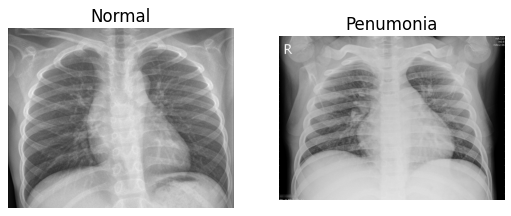

In [6]:
img1 = cv2.imread(r"/kaggle/input/pneumonia-chest-xray/chest_xray/test/test/NORMAL/IM-0006-0001.jpeg")
img2 = cv2.imread(r"/kaggle/input/pneumonia-chest-xray/chest_xray/test/test/PNEUMONIA/person21_virus_53.jpeg")

print(img1.shape)
fig ,ax = plt.subplots(nrows = 1 ,ncols = 2 ,figsize=(8,8),dpi=80)
ax[0].imshow(img1)
ax[0].axis('Off')
ax[0].set_title("Normal" ,fontsize = 15)

print(img2.shape)
ax[1].imshow(img2)
ax[1].axis('Off')
ax[1].set_title("Penumonia" ,fontsize = 15)

#plt.tight_layout()
plt.show()

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 4 : Load VGG16 Dataset. </p>

In [7]:
conv_base = tf.keras.applications.VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58889256/58889256 [==============================] - 2s 0us/step


In [8]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# create Folder /kaggle/working/
import os
os.makedirs(r'/kaggle/working/Model_Images' ,exist_ok= True)

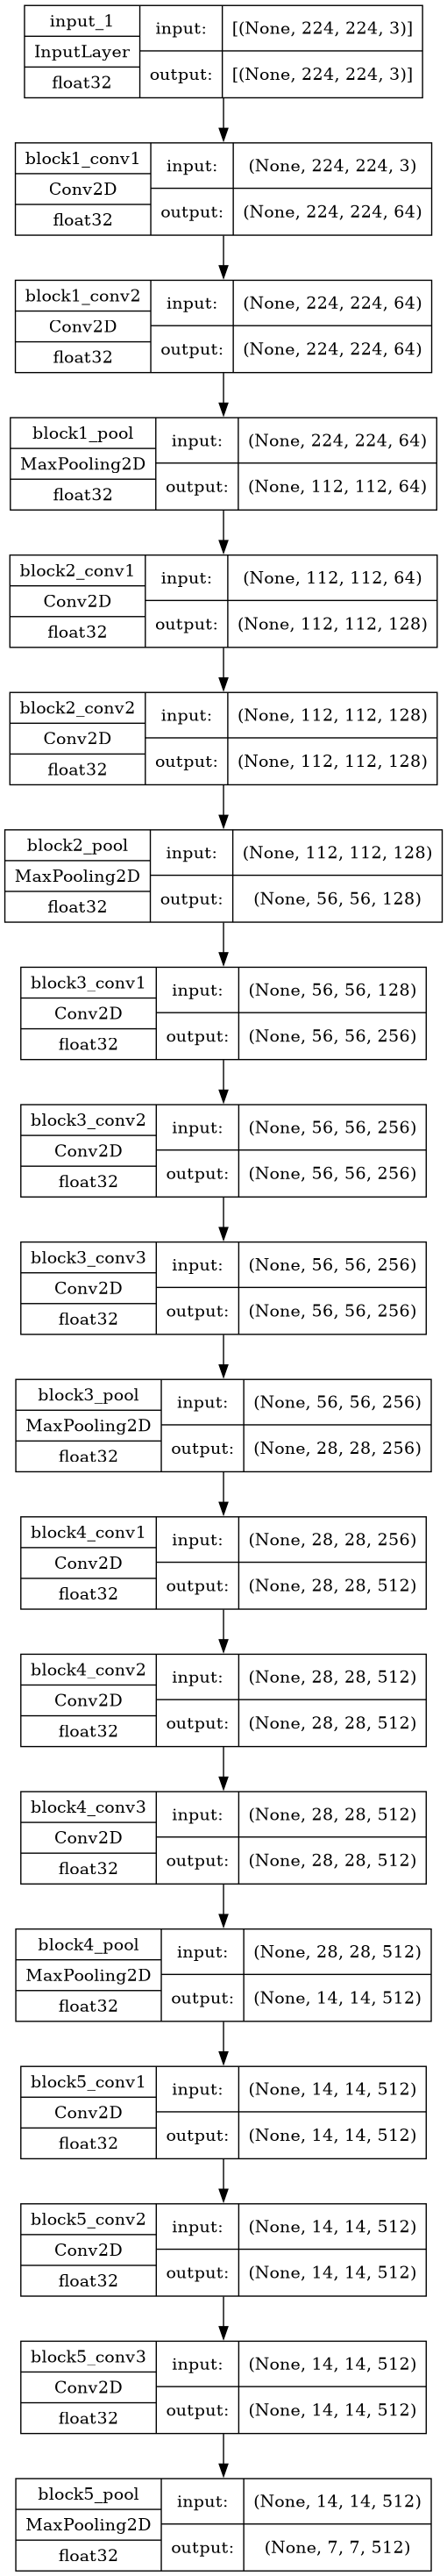

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(conv_base,to_file="/kaggle/working/Model_Images/VGG16.png",show_shapes=True, 
                          show_layer_names=True,show_dtype=True,dpi=100)

Let's build network

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 5 : Build Network. </p>

In [13]:
from tensorflow.keras import Model
from tensorflow.keras import models ,layers
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Decsion Layer

headmodel = conv_base.output

headmodel = layers.Flatten()(headmodel)

headmodel = layers.Dense(units=128,activation='relu')(headmodel)

headmodel = layers.Dropout(0.5)(headmodel)# Add Penalty

headmodel = layers.Dense(units=128,activation='relu')(headmodel)

headmodel = layers.Dropout(0.5)(headmodel) # Add Penalty

headmodel = layers.Dense(units=1 , activation='sigmoid')(headmodel)

network = models.Model (inputs = conv_base.input,outputs = headmodel)


In [ ]:
# If we Need to make Network Sequential
'''
#network = models.Sequential()

# Add conv_base for network

# network.add(conv_base)

# network.add(layers.Flatten())

# network.add(layers.Dense(units=256,activation='relu'))

# network.add(layers.Dropout(0.5))# Add Penalty

# network.add(layers.Dense(units=128,activation='relu'))

# network.add(layers.Dropout(0.5))

# network.add(layers.Dense(units=1 , activation='sigmoid'))'''

In [14]:
network.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

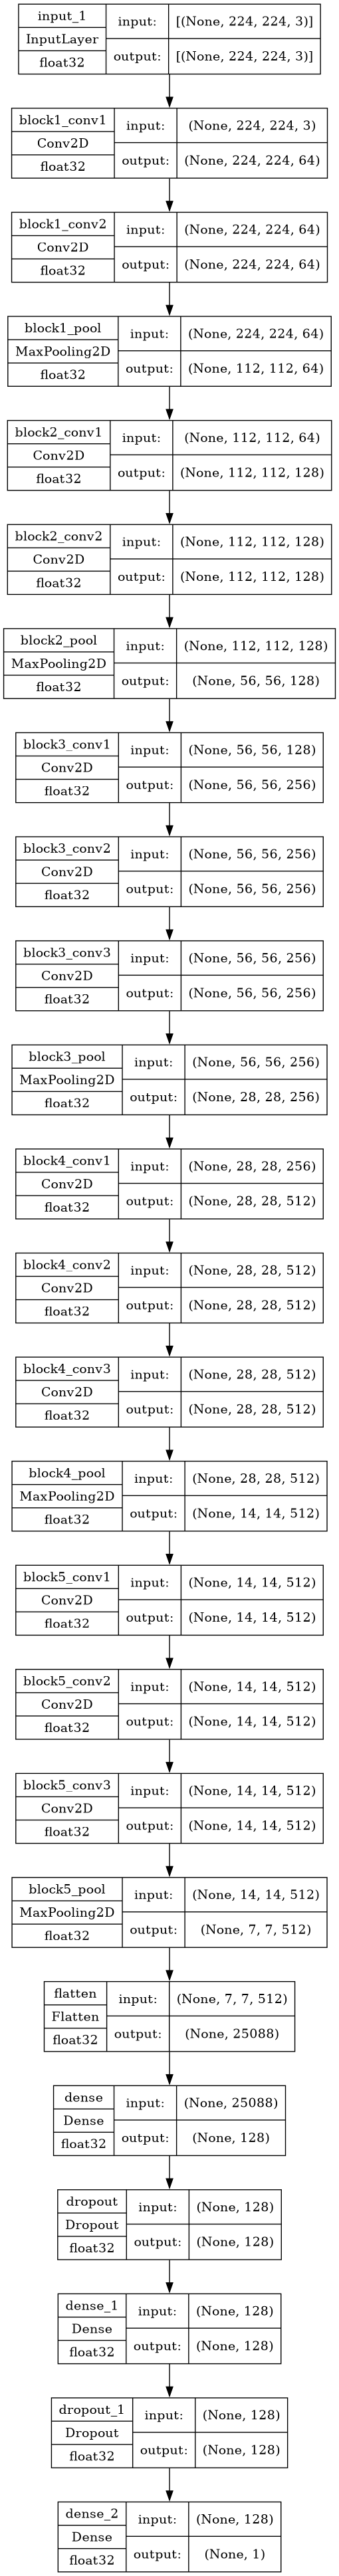

In [16]:
from tensorflow.keras.utils import plot_model

plot_model(network,to_file=r"/kaggle/working/Model_Images/Network_plot.png",show_shapes=True, 
                          show_layer_names=True,show_dtype=True,dpi=100)

### ***Let's Freeze layers from conv_base***

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 6 :  Freeze layers from conv_base. </p>

In [17]:
# conv_base.trainable = False
for layer in conv_base.layers:
    layer.trainable = False

In [18]:
network.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

__loop over the layers in the model and show which ones are trainable or not__

In [19]:
for layer in conv_base.layers:
    print("{}: {}".format(layer,layer.trainable))

<keras.src.engine.input_layer.InputLayer object at 0x7dd09e2cb0d0>: False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd08c100730>: False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd080318c70>: False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7dd0803199c0>: False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd08031a170>: False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd08031a8f0>: False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7dd08031ba00>: False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd08031bfa0>: False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd08031bac0>: False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd0641309a0>: False
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7dd064132410>: False
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd064132bc0>: False
<keras.src.layers.convolutional.conv

__Let's make Data Augmintation for Dataset__

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 7 :  Data Augmintation. </p>

In [20]:
train_dir_path = r'/kaggle/input/pneumonia-chest-xray/chest_xray/train/train'

test_dir_path  = r'/kaggle/input/pneumonia-chest-xray/chest_xray/test/test'

In [21]:
batch_size = 16

In [22]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(

    # rescale=1/255.0,

    preprocessing_function=preprocess_input,

    rotation_range=40,

    width_shift_range=0.2,

    height_shift_range=0.2,

    shear_range=0.2,

    zoom_range=0.2,

    fill_mode='nearest',

    horizontal_flip=True,

)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_gen.flow_from_directory(

    # This is the target directory for train images

    train_dir_path,

    # All images will be resized to 224x224

    target_size=(224,224),

    batch_size=batch_size,

    # Since we use binary_crossentropy loss, we need binary labels

    class_mode ='binary' ,

    shuffle=True

)

validation_generator = test_gen.flow_from_directory(

    # This is the target directory for test images

    test_dir_path,

     # All images will be resized to 224x224

    target_size=(224,224),

    batch_size=batch_size,

    # Since we use binary_crossentropy loss, we need binary labels

    class_mode ='binary' ,

    shuffle=True

)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [23]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [24]:
validation_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [25]:
validation_generator.samples

624

In [26]:
train_generator.samples

5216

In [27]:
steps_per_epoch = train_generator.samples // batch_size
print(steps_per_epoch)

326


In [28]:
validation_steps = validation_generator.samples // batch_size
print(validation_steps)

39


In [29]:
# Check the output of the validation_generator
x_batch, y_batch = next(validation_generator)
print("Batch of images shape:", x_batch.shape)  # Should be (batch_size, 224, 224, 3)
print("Batch of labels shape:", y_batch.shape)  # Should be (batch_size,)

Batch of images shape: (16, 224, 224, 3)
Batch of labels shape: (16,)


In [30]:
if validation_generator is None:
    print("Validation data is None!")
else:
    print("Validation data exists.")

Validation data exists.


__Let's Compile Model__

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 8 :  Let's Compile Model. </p>

In [31]:
from tensorflow.keras.optimizers import SGD

opt = SGD(learning_rate = 2e-5,momentum=0.9)
network.compile(optimizer=opt,
                     loss='binary_crossentropy',
                                        metrics=['accuracy']
)

In [32]:
# Check the output of the train_generator
x, y = next(train_generator)
train_logs = network.train_on_batch(x, y)
print("Single batch training logs:", train_logs)
print("Single batch validation logs:", train_logs)

Single batch training logs: [4.670875072479248, 0.5625]
Single batch validation logs: [4.670875072479248, 0.5625]


I0000 00:00:1731787703.749160     119 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [33]:
val_x, val_y =  next(validation_generator)
val_logs = network.test_on_batch(val_x, val_y)
print("Single batch training logs:", val_logs)
print("Single batch validation logs:", val_logs)

Single batch training logs: [3.299215316772461, 0.3125]
Single batch validation logs: [3.299215316772461, 0.3125]


In [34]:
x, y = next(train_generator)
val_x, val_y =  next(validation_generator)
logs = network.train_on_batch(x, y)
val_logs = network.test_on_batch(val_x, val_y)
print("Single batch training logs:", logs)
print("Single batch validation logs:", val_logs)

Single batch training logs: [2.300795078277588, 0.5625]
Single batch validation logs: [3.494865894317627, 0.4375]


In [20]:
!pip install livelossplot > /dev/null 2>&1

In [35]:
!nvidia-smi

Sat Nov 16 20:08:47 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   65C    P0             28W /   70W |   14069MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Initial Training

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 9 : Initial Training Phase (Model heating process). </p>

In [36]:
Model_trainer  = network.fit(

    train_generator,

    steps_per_epoch = train_generator.samples//batch_size,

    validation_data = validation_generator,

    validation_steps = validation_generator.samples//batch_size,

    epochs=10,
   
    verbose = 1
)

Epoch 1/10
326/326 [==============================] - 122s 370ms/step - loss: 1.1210 - accuracy: 0.7389 - val_loss: 0.4037 - val_accuracy: 0.8109
Epoch 2/10
326/326 [==============================] - 101s 309ms/step - loss: 0.4726 - accuracy: 0.8085 - val_loss: 0.3889 - val_accuracy: 0.8301
Epoch 3/10
326/326 [==============================] - 101s 310ms/step - loss: 0.3736 - accuracy: 0.8265 - val_loss: 0.3346 - val_accuracy: 0.8686
Epoch 4/10
326/326 [==============================] - 102s 312ms/step - loss: 0.3641 - accuracy: 0.8353 - val_loss: 0.3486 - val_accuracy: 0.8510
Epoch 5/10
326/326 [==============================] - 100s 306ms/step - loss: 0.3347 - accuracy: 0.8491 - val_loss: 0.3763 - val_accuracy: 0.8381
Epoch 6/10
326/326 [==============================] - 100s 308ms/step - loss: 0.3192 - accuracy: 0.8520 - val_loss: 0.3190 - val_accuracy: 0.8622
Epoch 7/10
326/326 [==============================] - 100s 307ms/step - loss: 0.3187 - accuracy: 0.8554 - val_loss: 0.3571 -

In [ ]:
# # Fit Model
'''
from livelossplot import PlotLossesKeras

Model_trainer = network.fit(

     train_generator,

     steps_per_epoch=train_generator.samples//batch_size,

     epochs=10,

     validation_data=validation_generator,

     validation_steps=validation_generator.samples//batch_size,

     callbacks=[PlotLossesKeras()]

)
'''

__NOw We need to unfreeze last block in VGG16 to _Fin tune___

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 10 : Unfreeze last block in the model (for fine-tuning). </p>

In [37]:
for layer in conv_base.layers[15:]:
    layer.trainable = True

In [38]:
c=1
for layer in conv_base.layers:
    print(c," {} ,{}".format(layer,layer.trainable))
    c+=1

1  <keras.src.engine.input_layer.InputLayer object at 0x7dd09e2cb0d0> ,False
2  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd08c100730> ,False
3  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd080318c70> ,False
4  <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7dd0803199c0> ,False
5  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd08031a170> ,False
6  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd08031a8f0> ,False
7  <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7dd08031ba00> ,False
8  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd08031bfa0> ,False
9  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd08031bac0> ,False
10  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd0641309a0> ,False
11  <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7dd064132410> ,False
12  <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7dd064132bc0> ,Fal

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 11 : Recompile the model after unfreezing layers. </p>

In [39]:
# Recompile Model with differnet lerning rate
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate =1e-5,momentum=0.9)
network.compile(optimizer=opt,
                         loss='binary_crossentropy',
                                                metrics=['accuracy']
)

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 12 : Fine-tune the model on the new data. </p>

In [40]:
# Re Fit Model

Model_trainer  = network.fit(
    
    train_generator,

    steps_per_epoch=train_generator.samples//batch_size,

    validation_data=validation_generator,

    validation_steps=validation_generator.samples//batch_size,

    epochs=25,

    verbose=1

)

Epoch 1/25
326/326 [==============================] - 104s 314ms/step - loss: 0.2634 - accuracy: 0.8744 - val_loss: 0.2972 - val_accuracy: 0.8910
Epoch 2/25
326/326 [==============================] - 102s 314ms/step - loss: 0.2461 - accuracy: 0.8888 - val_loss: 0.3432 - val_accuracy: 0.8798
Epoch 3/25
326/326 [==============================] - 100s 308ms/step - loss: 0.2491 - accuracy: 0.8961 - val_loss: 0.2603 - val_accuracy: 0.8958
Epoch 4/25
326/326 [==============================] - 101s 310ms/step - loss: 0.2301 - accuracy: 0.9038 - val_loss: 0.2593 - val_accuracy: 0.9135
Epoch 5/25
326/326 [==============================] - 101s 308ms/step - loss: 0.2305 - accuracy: 0.9038 - val_loss: 0.2999 - val_accuracy: 0.8910
Epoch 6/25
326/326 [==============================] - 101s 309ms/step - loss: 0.2151 - accuracy: 0.9084 - val_loss: 0.3102 - val_accuracy: 0.8910
Epoch 7/25
326/326 [==============================] - 100s 308ms/step - loss: 0.1983 - accuracy: 0.9093 - val_loss: 0.2662 -

### Let's evaluate validation data

In [41]:
loss,accuracy = network.evaluate(validation_generator,verbose=2)

39/39 - 5s - loss: 0.2364 - accuracy: 0.9327 - 5s/epoch - 141ms/step


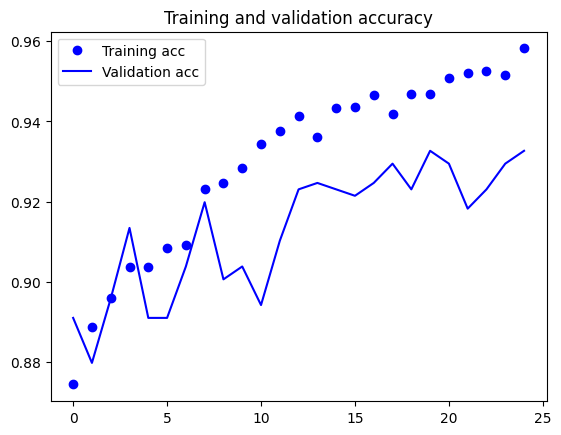

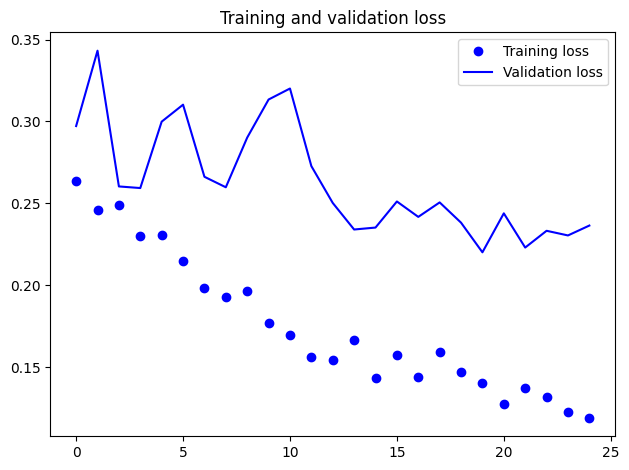

In [43]:
from matplotlib import pyplot as plt

acc = Model_trainer.history['accuracy']

val_acc = Model_trainer.history['val_accuracy']

loss = Model_trainer.history['loss']

val_loss = Model_trainer.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')

plt.legend()

plt.savefig(r"/kaggle/working/Model_Images/Training_validation_accuracy.png")

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.savefig(r"/kaggle/working/Model_Images/Training_validation_loss.png")

plt.tight_layout()
plt.show()

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 13 : Smoothing the Curves. </p>

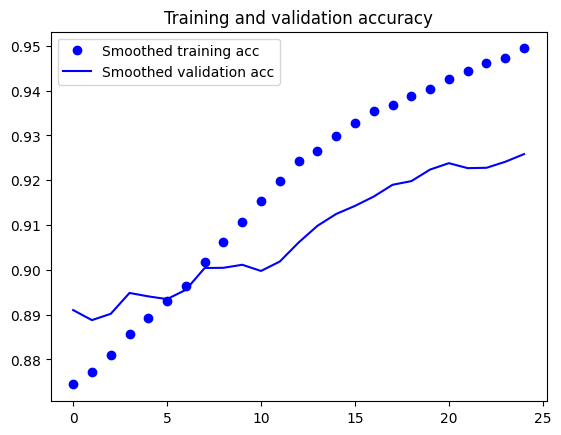

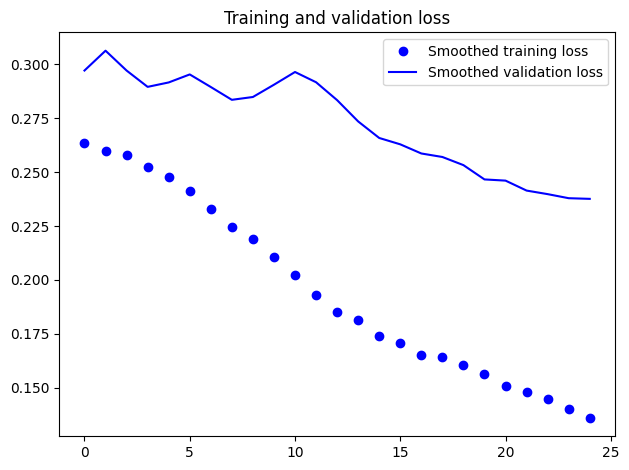

In [44]:
acc = Model_trainer.history['accuracy']

val_acc = Model_trainer.history['val_accuracy']

loss = Model_trainer.history['loss']

val_loss = Model_trainer.history['val_loss']

def smooth_curve(points, factor=0.8):

    smoothed_points = []

    for point in points:

        if smoothed_points:

            previous = smoothed_points[-1]

            smoothed_points.append(previous * factor + point * (1 - factor))

        else:

            smoothed_points.append(point)

    return smoothed_points

plt.plot(epochs,

         smooth_curve(acc), 'bo', label='Smoothed training acc')

plt.plot(epochs,

         smooth_curve(val_acc), 'b', label='Smoothed validation acc')

plt.title('Training and validation accuracy')

plt.legend()

plt.savefig(r"/kaggle/working/Model_Images/Training_validation_accuracy1.png")

plt.figure()


plt.plot(epochs,

         smooth_curve(loss), 'bo', label='Smoothed training loss')

plt.plot(epochs,

         smooth_curve(val_loss), 'b', label='Smoothed validation loss')

plt.title('Training and validation loss')

plt.legend()

plt.savefig(r"/kaggle/working/Model_Images/Training_validation_loss1.png")


plt.tight_layout()
plt.show()

In [45]:
import os 
os.makedirs(r'/kaggle/working/Model_Weights' ,exist_ok=True)

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 14 : Save Model_Weights. </p>

In [46]:
# save model

network.save(r'/kaggle/working/Model_Weights/Pneumonia_Diagnos_Prediction.h5')

In [49]:
from keras.models import load_model

model = load_model(r'/kaggle/working/Model_Weights/Pneumonia_Diagnos_Prediction.h5')

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 15 : Model Evaluation. </p>

1/1 [==============================] - 0s 20ms/step
[[0.8553981]]
PNEUMONIA


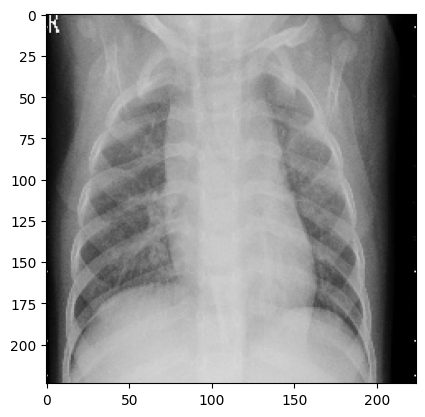

1/1 [==============================] - 0s 20ms/step
[[0.9988166]]
PNEUMONIA


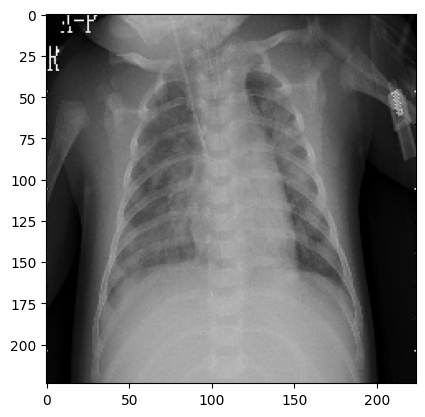

1/1 [==============================] - 0s 21ms/step
[[0.9997563]]
PNEUMONIA


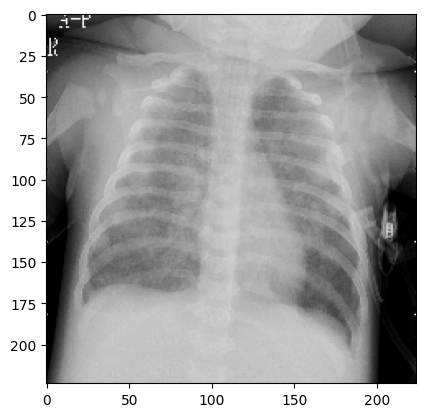

1/1 [==============================] - 0s 20ms/step
[[0.9604356]]
PNEUMONIA


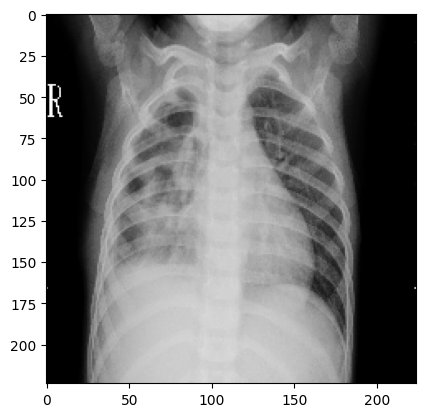

1/1 [==============================] - 0s 20ms/step
[[0.9998093]]
PNEUMONIA


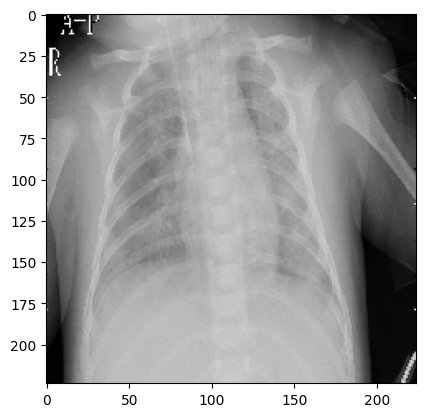

1/1 [==============================] - 0s 19ms/step
[[0.9991684]]
PNEUMONIA


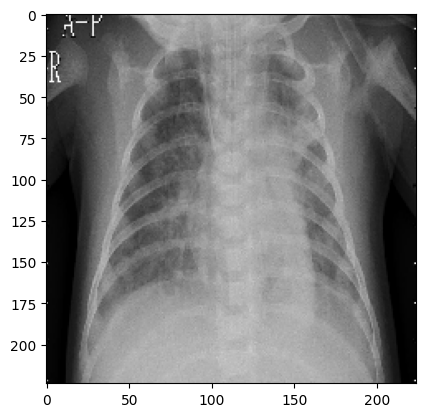

1/1 [==============================] - 0s 19ms/step
[[0.76806915]]
PNEUMONIA


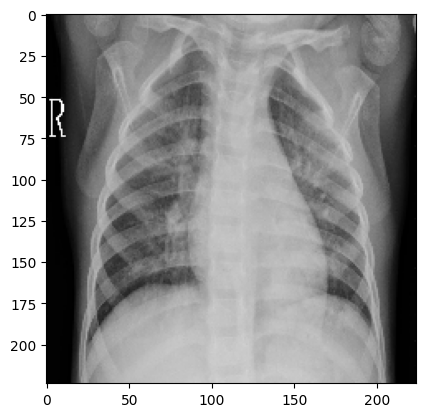

1/1 [==============================] - 0s 20ms/step
[[0.92361504]]
PNEUMONIA


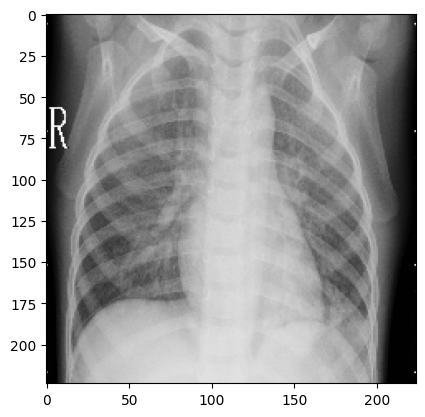

In [53]:
import numpy as np

from keras.applications.vgg16 import preprocess_input

from keras.preprocessing.image import img_to_array,load_img

vaildation_dir = r'/kaggle/input/pneumonia-chest-xray/chest_xray/val/val/PNEUMONIA'

for i in os.listdir(vaildation_dir):

    img = load_img(vaildation_dir+'//'+i,target_size=(224,224))

    plt.imshow(img)

    #plt.axis('off')
    
    img = img_to_array(img)

    img = img.reshape((1,)+img.shape)

    img = preprocess_input(img)

    pridict_value = model.predict(img)

    np.vstack([pridict_value])

    print(np.vstack([pridict_value]))

    if np.round(pridict_value[0][0])==0:
        print("NORMAL")
    else:
        print("PNEUMONIA")

    plt.show()

1/1 [==============================] - 0s 19ms/step
[[0.01035696]]
NORMAL


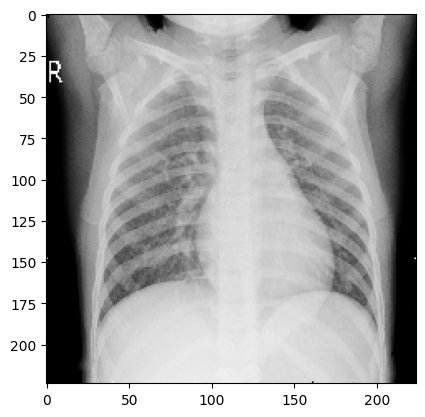

1/1 [==============================] - 0s 19ms/step
[[0.00430009]]
NORMAL


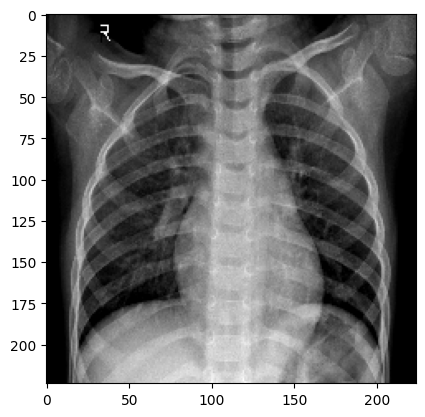

1/1 [==============================] - 0s 19ms/step
[[6.130274e-06]]
NORMAL


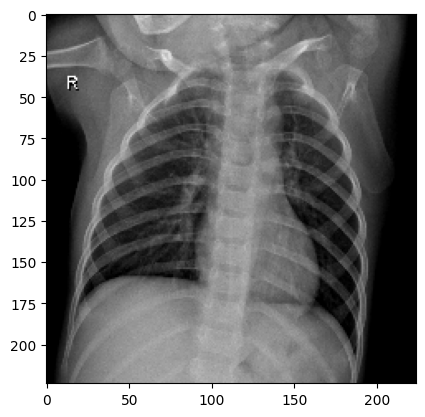

1/1 [==============================] - 0s 20ms/step
[[0.02977789]]
NORMAL


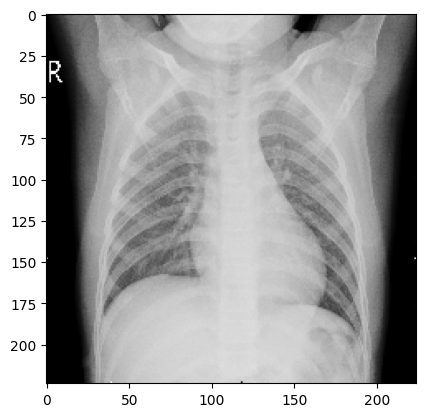

1/1 [==============================] - 0s 20ms/step
[[4.3696935e-05]]
NORMAL


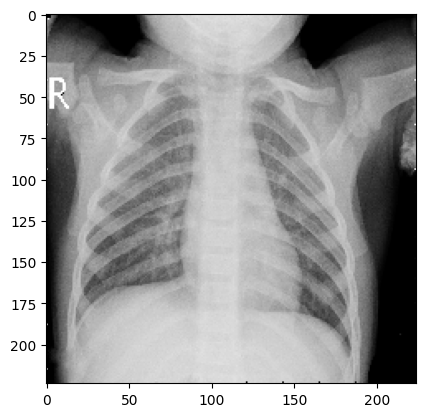

1/1 [==============================] - 0s 21ms/step
[[0.00306045]]
NORMAL


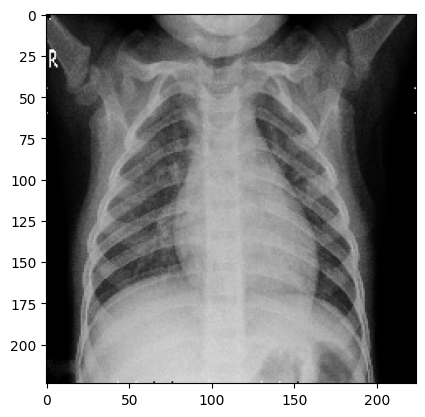

1/1 [==============================] - 0s 21ms/step
[[0.70630276]]
PNEUMONIA


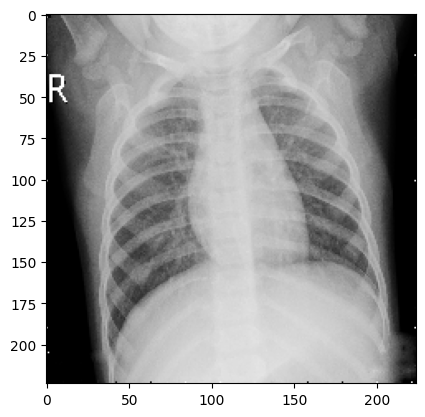

1/1 [==============================] - 0s 20ms/step
[[0.0046959]]
NORMAL


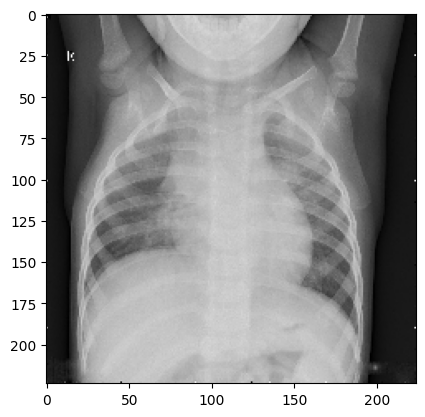

In [52]:
import numpy as np

from keras.applications.vgg16 import preprocess_input

from keras.preprocessing.image import img_to_array,load_img

vaildation_dir = r'/kaggle/input/pneumonia-chest-xray/chest_xray/val/val/NORMAL'

for i in os.listdir(vaildation_dir):

    img = load_img(vaildation_dir+'//'+i,target_size=(224,224))

    plt.imshow(img)

    #plt.axis('off')
    
    img = img_to_array(img)

    img = img.reshape((1,)+img.shape)

    img = preprocess_input(img)

    pridict_value = model.predict(img)

    np.vstack([pridict_value])

    print(np.vstack([pridict_value]))

    if np.round(pridict_value[0][0])==0:
        print("NORMAL")
    else:
        print("PNEUMONIA")

    plt.show()

# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">◍ Step 16 : 📊 Conclusion. </p>

## 🌟 Project Overview

In this project, we explored **Transfer Learning** to achieve **High Accuracy**. The results have demonstrated promising insights, especially in terms of:-
## 📈 Model Accuracy
- Achieving significant predictive accuracy: **95%** for training and **93%** for validati.### 

## 🛠 Next Steps
We plan to extend this project by:
- Experimenting with additional **Pre-Trained Models**.
- Enhancing the overall model performance through **Regularization**.

This is just the beginning of a journey towards more advanced data analysis and modeling. Stay tuned for more updates and improvements in future iterations of this work! 🚀
